# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

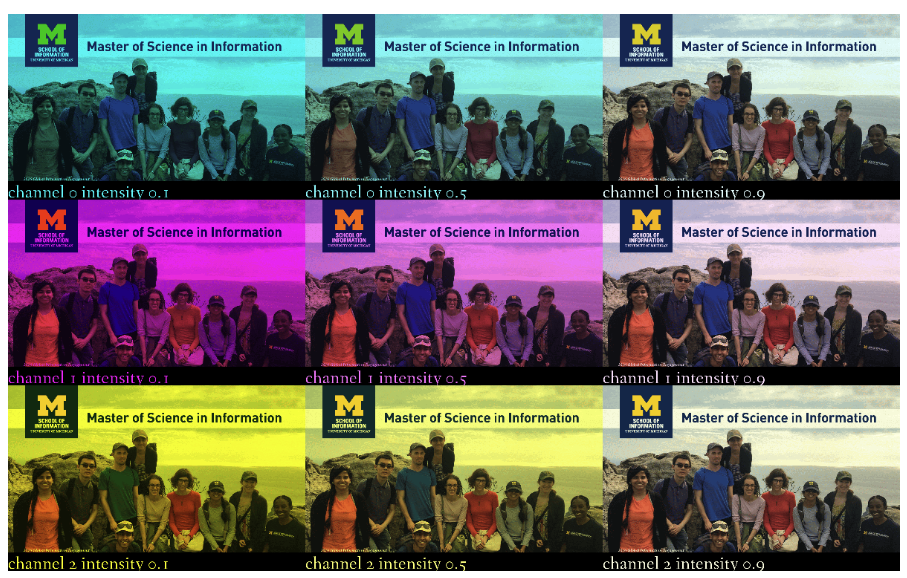

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

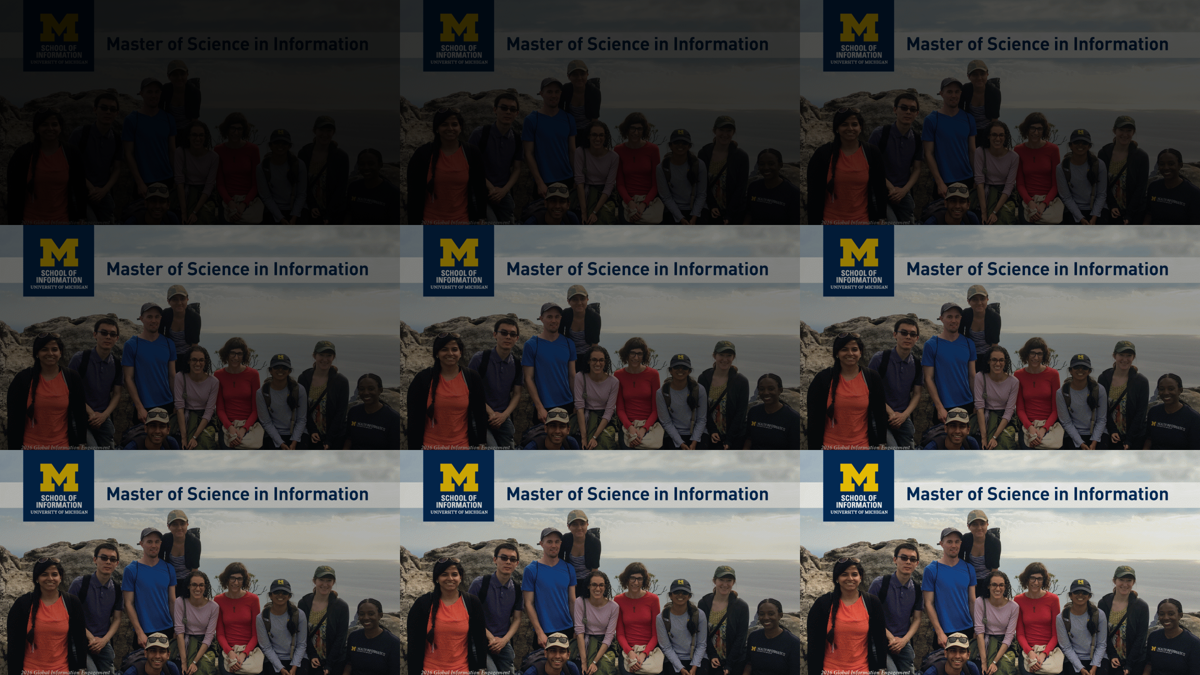

In [1]:
import PIL
from PIL import Image, ImageFont, ImageDraw, ImageEnhance, ImageColor

# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different brightnesses
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

### Apply Lower Black Third For Future Text

#### Code Quick Run Down
* Use PIL (Python Image Library), Image Object from PIL Libray
* Read in photo with Image Library and open method, convert to RGB
* Create new Image instance (defaults to black) and set `black box` new image instance to the same width of the default image read in above
* After creating black box, create `concat_image` to the widht each image above shares and set the height to both images above added height
* On the `concat_image` use the Image instances' paste method to initially set the read in default image to the **top** of the image frame and then set the black box on the same `concat_image` and offset the second height argument in the tuple argument (2nd for paste method) to place at the lower edge

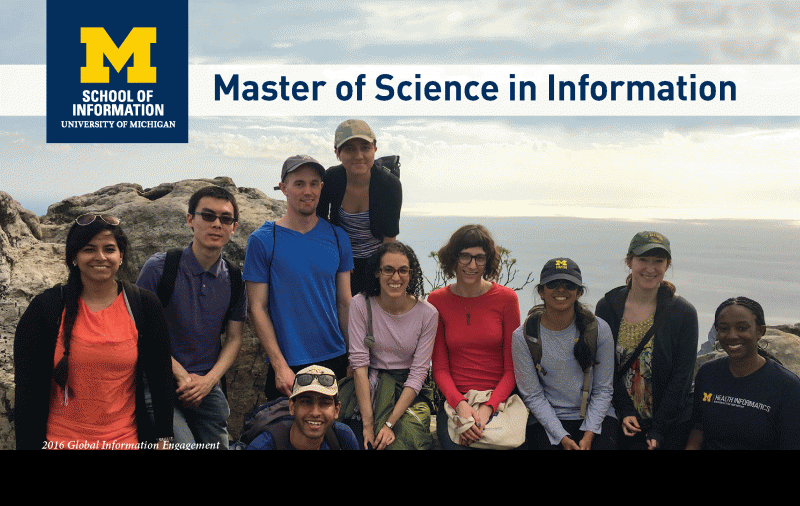

In [3]:
# Concatenate Images for black lower bottom for later text
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="../ReadOnly/msi_recruitment.gif"
image=Image.open(file).convert('RGB')
black_box= Image.new('RGB', (image.width, int(image.height/8)))
concat_image = Image.new('RGB', (image.width, image.height + black_box.height))
concat_image.paste(image, (0, 0))
concat_image.paste(black_box, (0, image.height))


display(concat_image)
#print(dir(image))

### Another Quick Break-Down (Draw On Text Box)
* Read and convert default image
* Set Dictionary values for row/column type association for rgb setting in following loop and based on column value
    * Three Different Intensities 
        * (0.1 - reduce channel alot)
        * (0.5 - reduce the channel in half)
        * (0.9 - reduce the channel only a little bit)
        
* def black_box function
    * See markdown snippet above which is used to create an image instance for each channel/grid position and add a black box for later text insertion

* Loop goes through grid position (1/9) corresponding to values in img_idx_dict
    * each iteration of loop splits the template image (student background) into a r,g,b channel with the images' split method
    * Next the conditional check for the iterator looks at it's respective position for the grid (column check) and sets the image instance in the loop to hold the `r,g,b` value respective to either the red, green or blue intensity for the `row` channel.
    * Each check on the iterator associates to the column which shares the same intensity value that is altered for one of the `r,g,b` points.
    * The iterator then uses the shared value in the **idx_dict** to assign the `channel - row` image text as well as the intensity
        * 1-3 is first row, 4-6 is second row, 7-9 is last row
    * After the conditional check alters the `image intensity` for the particular `color - channel` and adds the text for channel/intensity setting, the image is added to the empty list
    
```python
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
```
    
* Next a contact sheet is created using a mode from one of the images altered above (any in the list would work) and the sheet is set to a width/length property that is 3 times one of the images created above so to account for a 3x3 grid


```python
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width
```

* Second Loop for conditional pasting of all created images into the `contact_sheet` Image instance (code above)
    * First conditional check checks if the x value is the length of the firws row in the contact sheet and if so, is an indication to reset the x value and add to the y value so as to paste on the `next row` in the contact sheet
        * This condition will be seen twice effectively in our loop so as to position where to paste the image in each iteration based on how the x/y value is adjusting based on the width check. Y is initially set to the image height and on a second iteration the same image height is added to double the value
    * The `else` will add on to x and be seen more commonly in the iteration to keep setting a x value that sets the paste directional coordinates


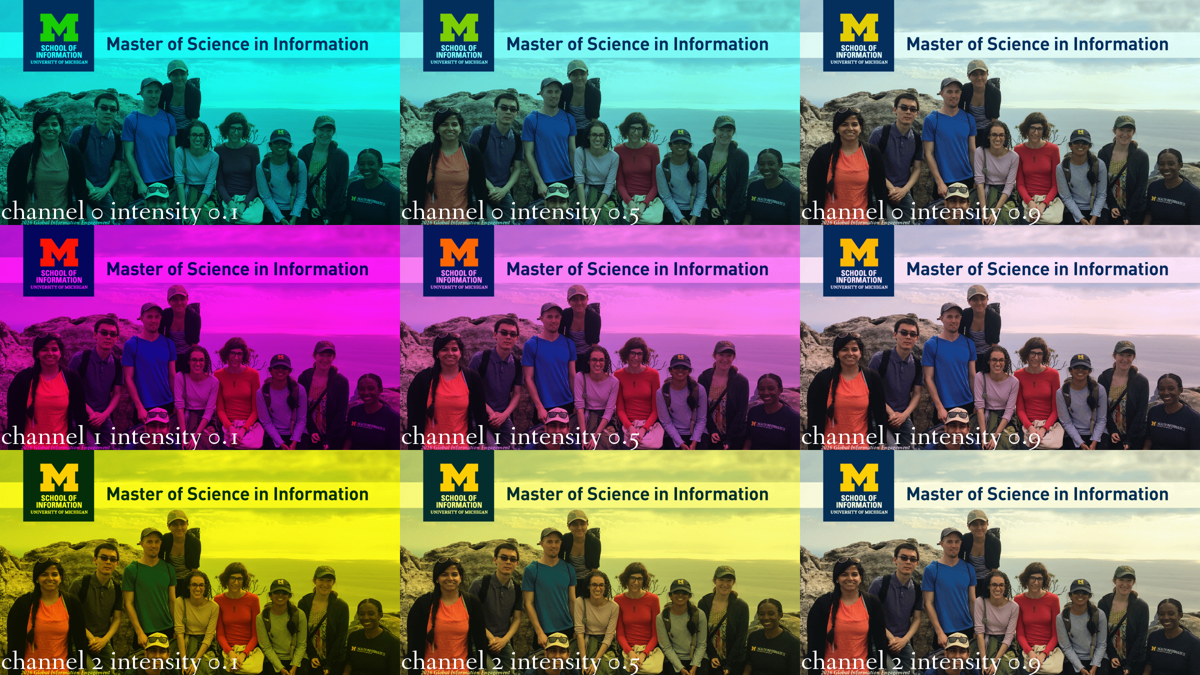

In [6]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}


def black_box_image_combined(img):
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_image.paste(img, (0, 0))
    concat_image.paste(black_box, (0, img.height))
    return concat_image

for l in range(1, 10):
    # nifty way to use tuple association for the image splitting after converting to 'rgb'
    r, g, b = image.split()
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, 400), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left')
        images_deux.append(img)
    

first_image_2=images_deux[0]
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)

### Additional Steps
* Here Below we simply call our `black_box` function at the beginning of each iteration so the image now contains the lower black box for our later `draw.text` calls
* The `draw.text` call made on each iteration uses a `fill` parameter to give color the text and is passed a singular pixel of the `img` variable (new image holding the altered values of either the r,g,b channel)

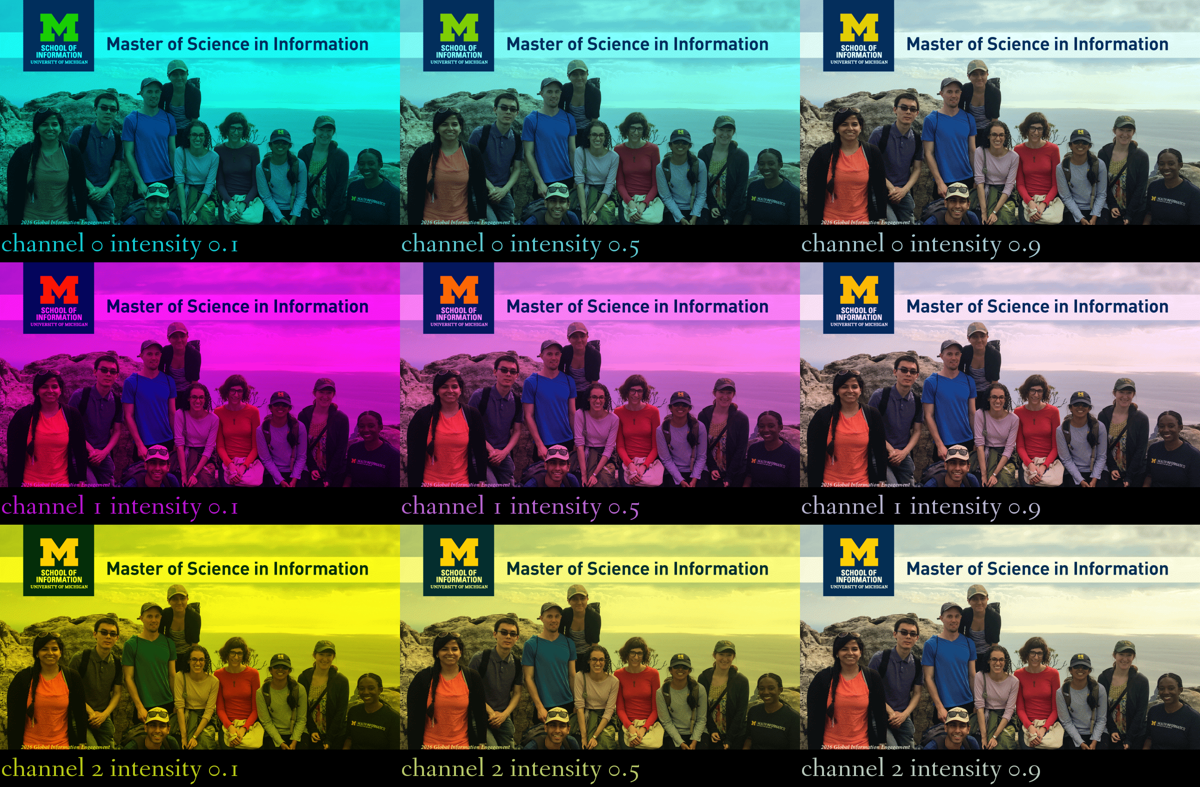

In [8]:
# read image and convert to RGB
image=Image.open("../ReadOnly/msi_recruitment.gif")
image=image.convert('RGB')

# build a list of 9 images which have different channel colors
# Set Dictionary values for row/column type association for rgb setting in following loop and based on column value,
# set the r/g/b type as : use three different intensities, 0.1 (reduce the channel a lot),
# 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit)

images_deux = []
img_idx_dict = {1:[0, 0.1], 2:[0, 0.5], 3:[0, 0.9], 4:[1, 0.1], 5:[1, 0.5], 6:[1, 0.9], 
                7:[2, 0.1], 8:[2, 0.5], 9:[2, 0.9]}



def black_box_image_combined(img):
    # Image new defaults to black (same width but just about an 1/8 of the hieght for the lower text)
    black_box = Image.new('RGB', (img.width, int(img.height/6)))
    # New image set to height of new additive black box height property
    concat_img = Image.new('RGB', (img.width, img.height + black_box.height))
    concat_img.paste(img, (0, 0))
    concat_img.paste(black_box, (0, img.height))
    #display(concat_img)
    return concat_img

for l in range(1, 10):
    # Use default image and add a black box (not cropping as will write in this box)
    concat_image = black_box_image_combined(image)
    # nifty way to use tuple association for the image splitting 
    r, g, b = concat_image.split()
    # use number type index to set image to be added to the array to loop through after for setting contact image
    # https://stackoverflow.com/questions/59320564/how-to-access-and-change-color-channels-using-pil
    if l in [1, 4, 7]:
        if l == 1:
            r = r.point(lambda i: i * .1)
        elif l == 4:
            g = g.point(lambda i: i * .1)
        else:
            b = b.point(lambda i: i * .1)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [2, 5, 8]:
        if l == 2:
            r = r.point(lambda i: i * .5)
        elif l == 5:
            g = g.point(lambda i: i * .5)
        else:
            b = b.point(lambda i: i * .5)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    if l in [3, 6, 9]:
        if l == 3:
            r = r.point(lambda i: i * .9)
        elif l == 6:
            g = g.point(lambda i: i * .9)
        else:
            b = b.point(lambda i: i * .9)
        img = Image.merge('RGB', (r, g, b))
        draw = ImageDraw.Draw(img)
        font_arg = ImageFont.truetype('fanwood-webfont.ttf', 55)
        draw.text((2, img.height - 60), text='channel {} intensity {}'.format(img_idx_dict[l][0], img_idx_dict[l][1]), 
                  font=font_arg, alignt='left', fill=img.getpixel((0,0)))
        images_deux.append(img)
    
# Use any image (just chose first) to set width and height properties for new contact sheet to paste into
first_image_2=images_deux[0]
# Create Contact Sheet
contact_sheet=PIL.Image.new(first_image_2.mode, (first_image_2.width*3,first_image_2.height*3))
x=0
y=0
        
for img in images_deux:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image_2.width == contact_sheet.width:
        x=0
        y=y+first_image_2.height
    else:
        x=x+first_image_2.width

# resize and display the contact sheet
contact_sheet_2 = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet_2)